In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
results_dir = "coloring"

In [3]:
data_filename = "graph_7__0__100000__False__0.8__0.60"

In [4]:
df = pd.read_csv(f"results/{results_dir}/{data_filename}.csv")

In [5]:
plt.ioff()
plt.figure(figsize=(20, 8))

<Figure size 2000x800 with 0 Axes>

In [6]:
df = df.set_index('Node')
df

,1,2,3,4,5,10,20,30,40,50,60,70,80,90,100,110,120
Node,,,,,,,,,,,,,,,,,
0,23520,14701,10068,7417,20415,15747,5396,1846,617,187,62,16,6,1,1,0,NaN
1,12252,9731,8718,7371,26417,23636,8047,2664,809,242,83,24,5,1,0,0,NaN
2,12340,9727,8488,7448,26556,23707,7849,2597,894,266,88,24,9,4,2,1,NaN
3,12142,9894,8524,7537,26419,23629,8006,2642,851,251,68,30,5,2,0,0,NaN
4,16564,10454,8167,6725,24030,22279,7737,2696,915,303,92,30,6,1,1,0,NaN
5,21658,14431,10382,7746,22679,16559,4799,1246,361,101,27,8,3,0,0,0,NaN
6,11295,9652,8577,7450,26660,24509,8101,2544,824,239,103,30,9,6,1,0,NaN
7,11346,9812,8529,7424,26832,23909,8166,2700,862,292,89,24,10,3,1,0,NaN
8,11484,9510,8460,7584,26775,24291,7981,2625,865,278,95,37,8,2,4,1,NaN


In [7]:
df = df.loc[[0, 4, 5, 9]]
df

,1,2,3,4,5,10,20,30,40,50,60,70,80,90,100,110,120
Node,,,,,,,,,,,,,,,,,
0,23520,14701,10068,7417,20415,15747,5396,1846,617,187,62,16,6,1,1,0,NaN
4,16564,10454,8167,6725,24030,22279,7737,2696,915,303,92,30,6,1,1,0,NaN
5,21658,14431,10382,7746,22679,16559,4799,1246,361,101,27,8,3,0,0,0,NaN
9,11340,9842,8524,7391,26746,24215,8005,2640,873,311,77,25,9,1,1,0,NaN


In [8]:
dft = df.transpose()
# dft.drop(['Node'], inplace=True)
df.index.names = ['count']
dft = dft.add_prefix("Node_")
dft

count,Node_0,Node_4,Node_5,Node_9
1,23520.0,16564.0,21658.0,11340.0
2,14701.0,10454.0,14431.0,9842.0
3,10068.0,8167.0,10382.0,8524.0
4,7417.0,6725.0,7746.0,7391.0
5,20415.0,24030.0,22679.0,26746.0
10,15747.0,22279.0,16559.0,24215.0
20,5396.0,7737.0,4799.0,8005.0
30,1846.0,2696.0,1246.0,2640.0
40,617.0,915.0,361.0,873.0
50,187.0,303.0,101.0,311.0


In [9]:
plt.ioff()
ax = sns.lineplot(dft, linewidth=2, markersize=10)

/home/agaru/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/agaru/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [10]:
markers = ('.', 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

In [11]:
for i, line in enumerate(ax.lines):
    line.set_marker(markers[i % len(df.index)])

In [12]:
def filename_parser(filename):
    graph_name, central_dist, no_sim, me, fault_prob, highest_fault_prob = filename.split("__")
    return f"Program: {results_dir} | Graph: {graph_name} | {'Distributed' if central_dist=='1' else 'Central'} | N: {no_sim} | ME: {me} | FP: {fault_prob} | Highest FP at any Node : {highest_fault_prob}"

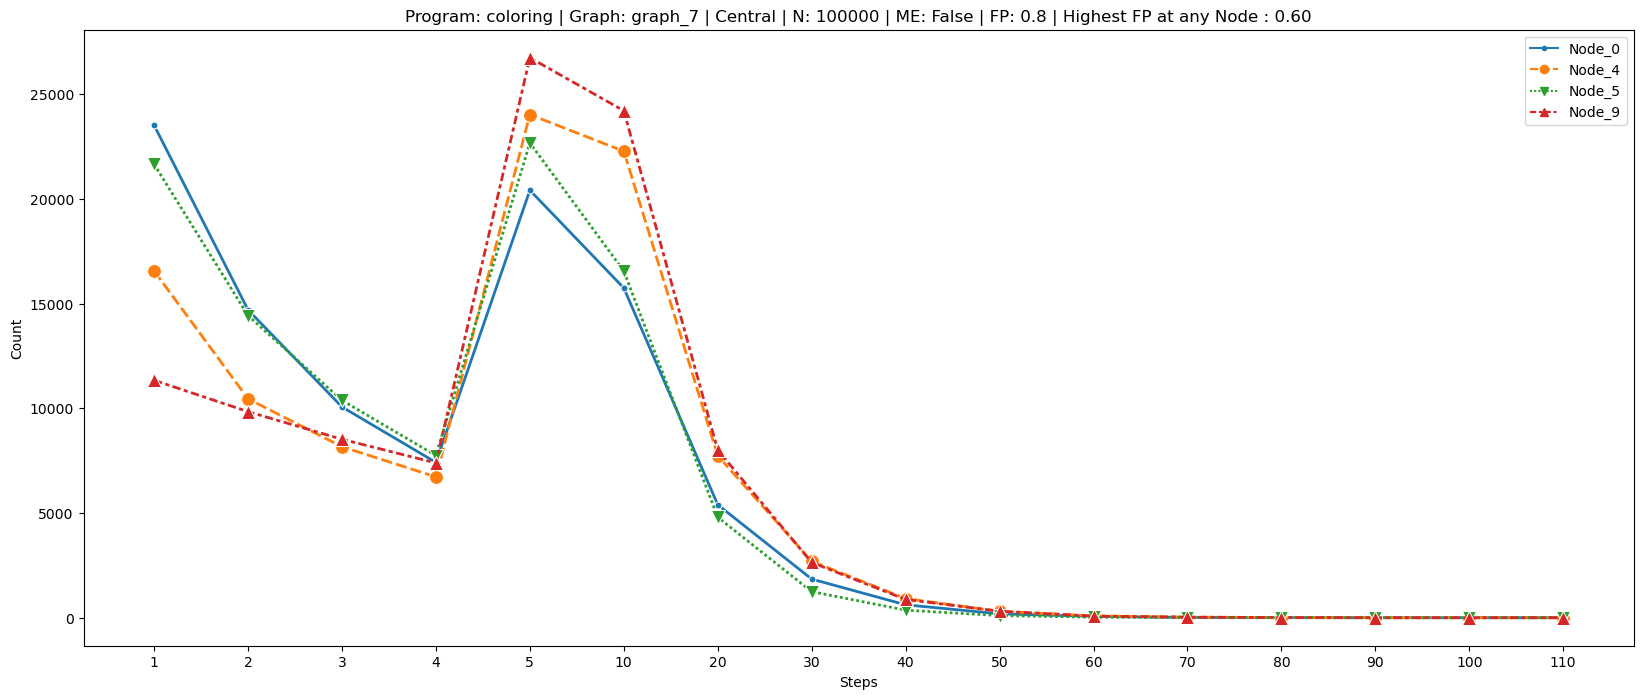

In [13]:
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Count")
plt.title(filename_parser(data_filename))
plt.show()
# plt.savefig(f"plots/{data_filename}.jpg", dpi=500)